In [2]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import json
def create_channel_image(channel_title,image_width,image_height,font_size,show=True,path:str=None,font_path="/usr/share/fonts/truetype/Roboto/Roboto-Regular.ttf",background_color = "#111312"):
    image = Image.new("RGB", (image_width, image_height), background_color)
    draw = ImageDraw.Draw(image)
    # Define the font and size for the text
    font = ImageFont.truetype(font_path, font_size)

    # Calculate the position to center the text
    text_width, text_height = draw.textsize(channel_title, font)

    x = (image.width - text_width) // 2
    y = (image.height - text_height) // 2



    decoration_size = int(font_size * .75)
    decoration_height = int(decoration_size *.8)
    decoration_weigth = int(decoration_size * .15) 
    decoration = Image.new("RGB", (decoration_height, decoration_size), background_color)
    decoration_draw = ImageDraw.Draw(decoration)
    decoration_draw.arc((0, 0, decoration_size, decoration_size), 60, 300, fill="white",width=decoration_weigth)
    decoration = decoration.rotate(-90, expand=True)
    decoration_text_x = (image.width - decoration_size) // 2
    decoration_text_y = ((image.height) // 2) - text_height

    image.paste(decoration, (decoration_text_x, decoration_text_y))
    draw.text((x, y), channel_title, font=font, fill="white")
    
    if show:
        plt.imshow(image)
        plt.axis('off')
        plt.show()
        
    if path is not None:
        image.save(path)
        

In [3]:
import os
import json
with open("../../channels.json","r") as f:
    channels = json.load(f)

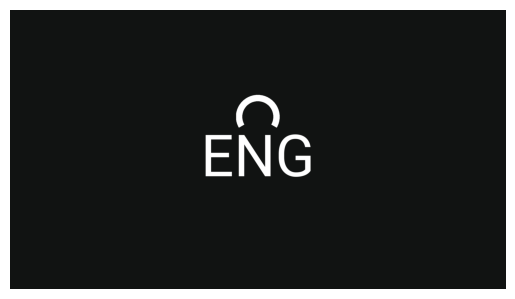

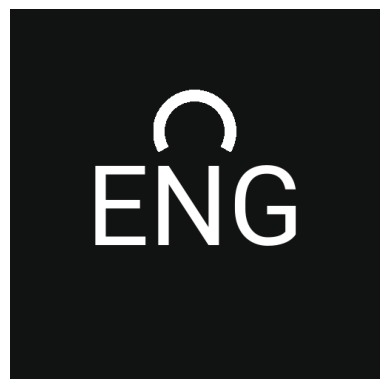

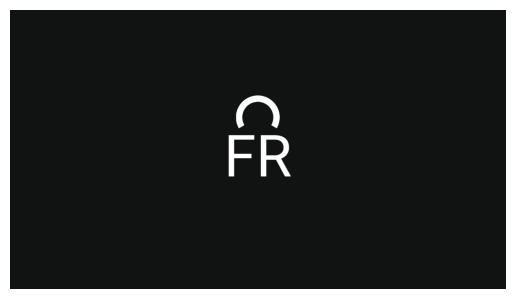

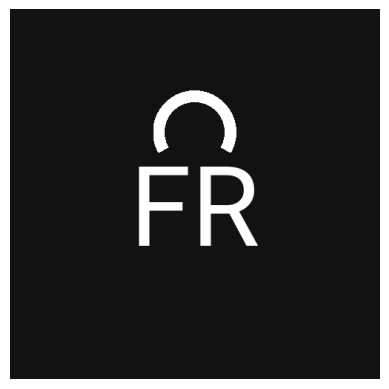

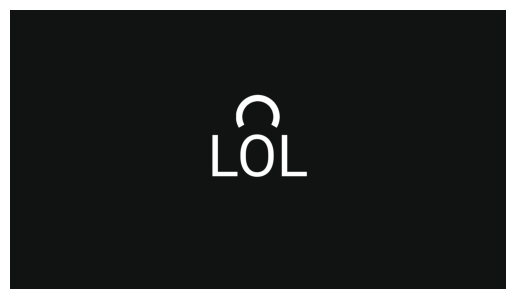

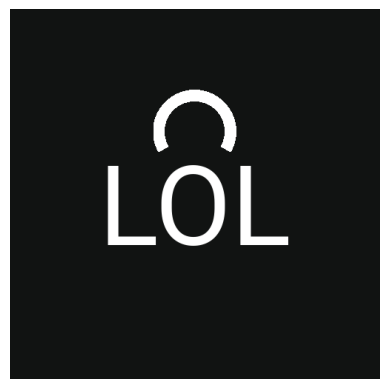

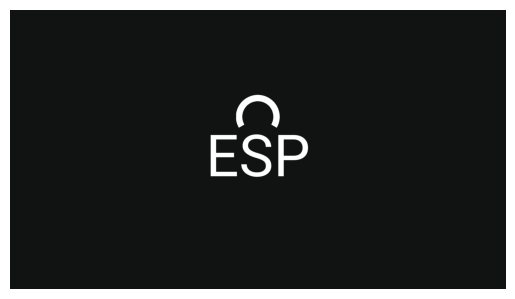

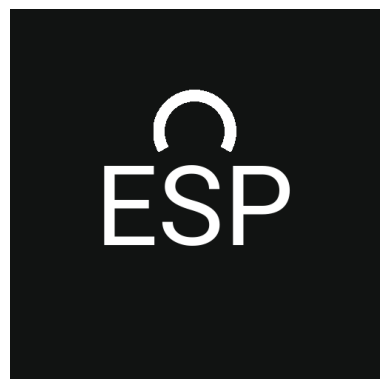

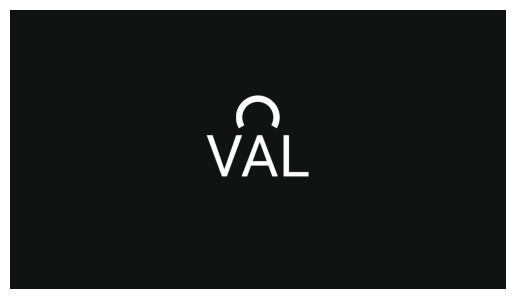

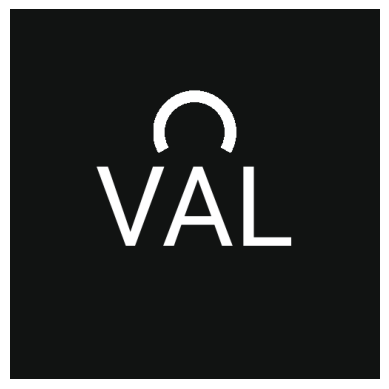

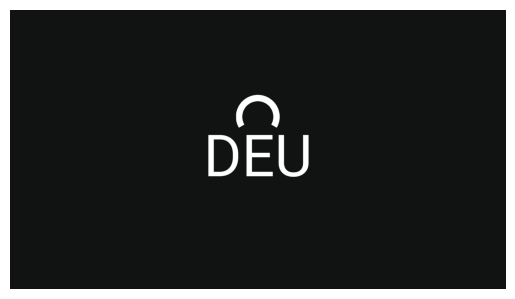

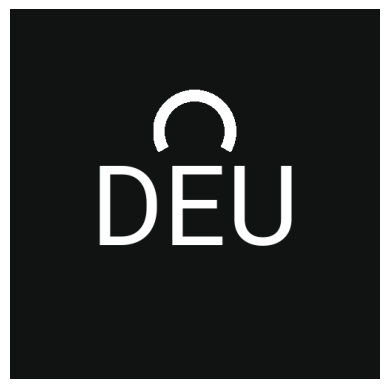

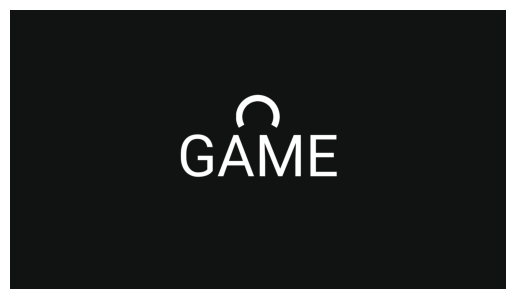

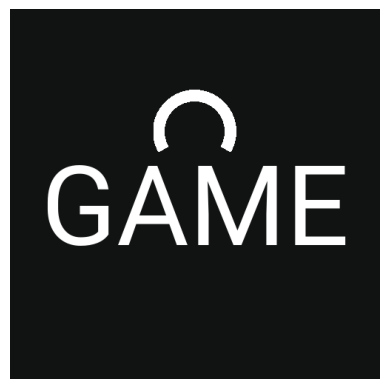

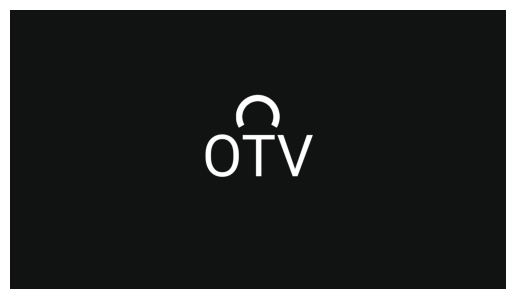

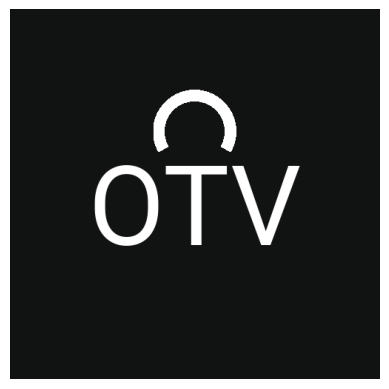

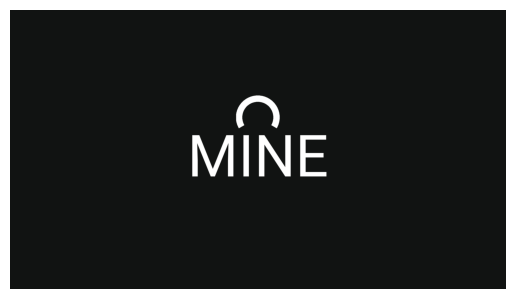

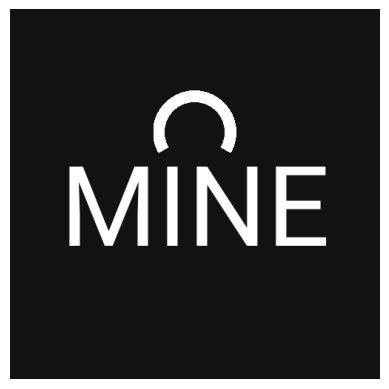

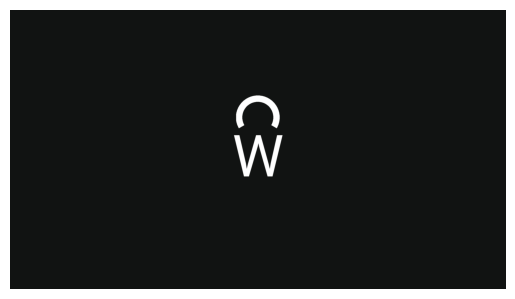

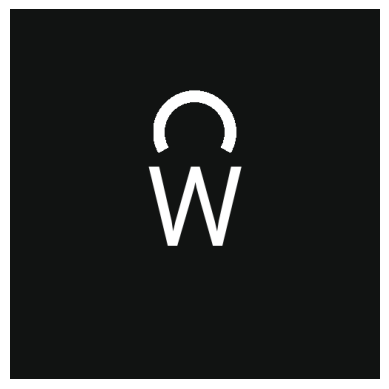

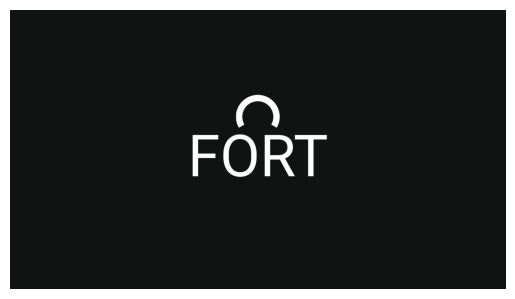

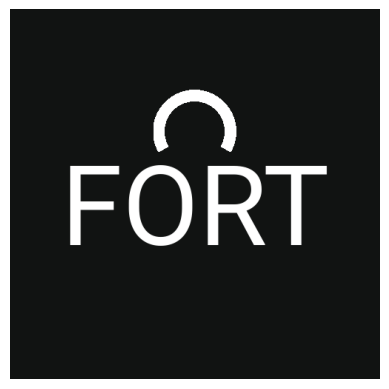

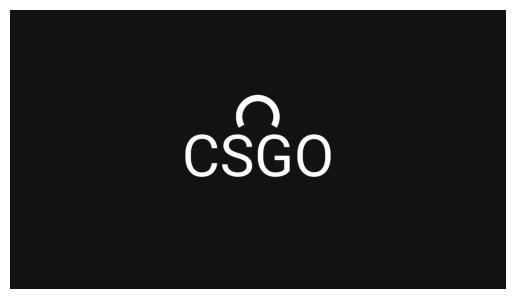

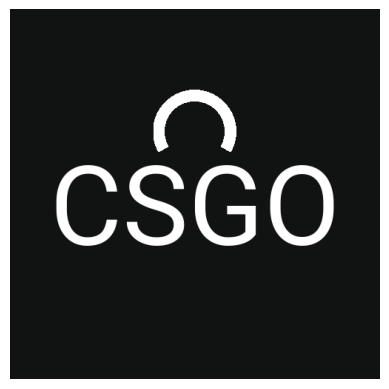

In [4]:

YOUTUBE_BANNER_SETTINGS = {
    "image_width":2560,
    "image_height":1440,
    "font_size":300
}

YOUTUBE_PFP_SETTINGS = {
    "image_width":500,
    "image_height":500,
    "font_size":150
}

path = "../../branding"
if not os.path.exists(path):
    os.mkdir(path)

for channel in channels:
    for brand_channel in channel["channels"]:
        brand_channel_path = os.path.join(path,brand_channel["channel-name"])
        
        if not os.path.exists(brand_channel_path):
            os.mkdir(brand_channel_path)

        PFP_path = os.path.join(brand_channel_path,"pfp.png")
        BANNER_path = os.path.join(brand_channel_path,"banner.png")
        
        create_channel_image(channel_title=brand_channel["channel-name"],**YOUTUBE_BANNER_SETTINGS,show=True,path=BANNER_path)
        create_channel_image(channel_title=brand_channel["channel-name"],**YOUTUBE_PFP_SETTINGS,show=True,path=PFP_path)
        
        